In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
import sys,os
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import scipy


In [2]:
%cd Food-5k

/Users/georgeasvestopoulos/Desktop/Projects/Tensorflow_Projects/Vgg_food_no_food/Food-5K


In [5]:
#plt.imshow(image.load_img('training/0_808.jpg'))



In [10]:
#plt.imshow(image.load_img('training/1_1000.jpg'))


In [7]:
IMAGE_SIZE = [200,200] #defined resolution to work with

In [8]:
!mkdir data

mkdir: data: File exists


In [9]:
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/non_food
!mkdir data/test/food
!mkdir data/test/non_food

mkdir: data/train: File exists
mkdir: data/test: File exists
mkdir: data/train/food: File exists
mkdir: data/train/non_food: File exists
mkdir: data/test/food: File exists
mkdir: data/test/non_food: File exists


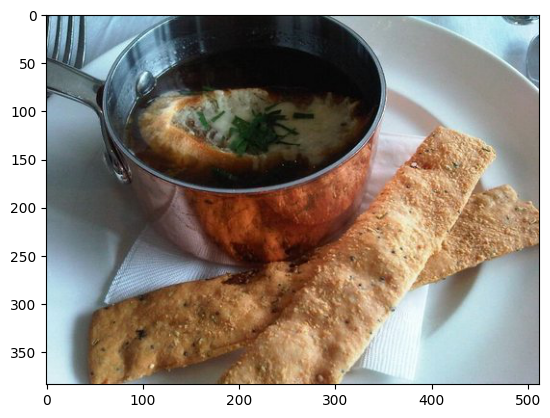

In [30]:
plt.imshow(image.load_img('data/train/food/1_0.jpg'))


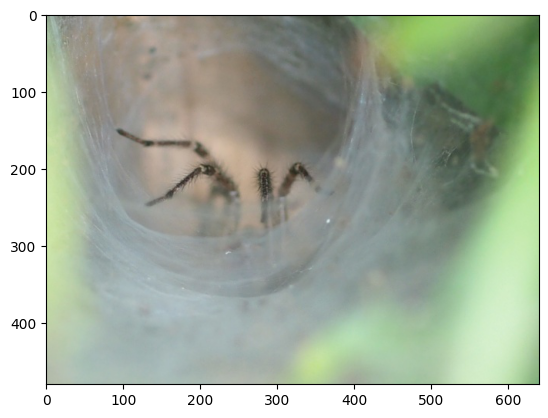

In [32]:
plt.imshow(image.load_img('data/train/non_food/0_1004.jpg'))


In [ ]:
!mv training/0*.jpg  data/training/non_food
!mv training/1*.jpg  data/training/food


In [ ]:
!mv validation/0*.jpg  data/test/non_food
!mv validation/1*.jpg  data/test/food


In [11]:
train_path = "data/train"

In [12]:
test_path = "data/test"

In [13]:
train_files = glob(train_path+"/*/*.jpg")

In [14]:
len(train_files)

3000

In [15]:
test_files = glob(test_path+"/*/*.jpg")

In [16]:
len(test_files)

1000

In [17]:
gen_train = ImageDataGenerator(horizontal_flip=True, height_shift_range=0.1,width_shift_range=0.1,rotation_range=20,preprocessing_function=preprocess_input)


gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)



In [18]:
training_generator = gen_train.flow_from_directory(directory=train_path,batch_size=128,target_size = IMAGE_SIZE, shuffle=True)



Found 3000 images belonging to 2 classes.


In [19]:
testing_generator = gen_test.flow_from_directory(directory=test_path,batch_size=128,target_size = IMAGE_SIZE)

Found 1000 images belonging to 2 classes.


In [20]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],weights="imagenet",include_top=False)

In [21]:
vgg.trainable = False

In [22]:
x = Flatten()(vgg.output)
x = Dense(2,activation="softmax")(x)
model = Model(inputs = vgg.input, outputs = x)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
r = model.fit_generator(training_generator, validation_data = testing_generator , epochs = 10, steps_per_epoch=int(np.ceil(len(train_files) / 128)),
  validation_steps=int(np.ceil(len(test_files) / 128)))




/var/folders/1f/vtv_zvv14n9b00wp884z712m0000gn/T/ipykernel_44103/4059408353.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_generator, validation_data = testing_generator , epochs = 10, steps_per_epoch=int(np.ceil(len(train_files) / 128)),


Epoch 1/10
24/24 [==============================] - 214s 9s/step - loss: 1.3888 - accuracy: 0.9493 - val_loss: 0.5640 - val_accuracy: 0.9780
Epoch 2/10
24/24 [==============================] - 211s 9s/step - loss: 0.4242 - accuracy: 0.9827 - val_loss: 0.5356 - val_accuracy: 0.9800
Epoch 3/10
24/24 [==============================] - 209s 9s/step - loss: 0.2556 - accuracy: 0.9887 - val_loss: 0.7142 - val_accuracy: 0.9740
Epoch 4/10
24/24 [==============================] - 209s 9s/step - loss: 0.1292 - accuracy: 0.9923 - val_loss: 0.6715 - val_accuracy: 0.9750
Epoch 5/10
24/24 [==============================] - 209s 9s/step - loss: 0.1488 - accuracy: 0.9883 - val_loss: 0.6867 - val_accuracy: 0.9760
Epoch 6/10
24/24 [==============================] - 209s 9s/step - loss: 0.1271 - accuracy: 0.9910 - val_loss: 0.6677 - val_accuracy: 0.9760
Epoch 7/10
24/24 [==============================] - 212s 9s/step - loss: 0.0868 - accuracy: 0.9933 - val_loss: 0.5875 - val_accuracy: 0.9790
Epoch 8/10
24

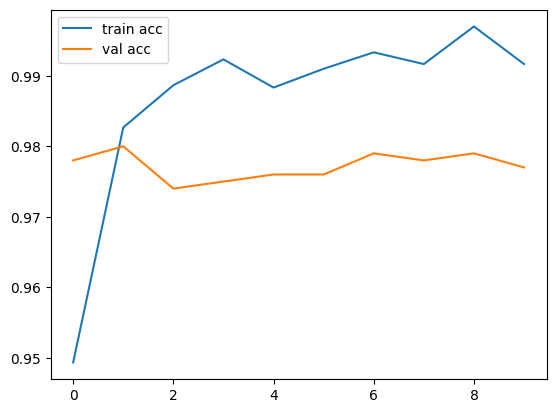

In [27]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()